# Outliers

In [165]:
import pandas as pd
import numpy as np
import plotly.express as px

import matplotlib.pyplot as plt

from scipy import stats

In [166]:
df = pd.DataFrame({'values':[4, 2, 750, 768, 860, 899, 950, 4000, 3000]})
df

,values
0,4
1,2
2,750
3,768
4,860
5,899
6,950
7,4000
8,3000


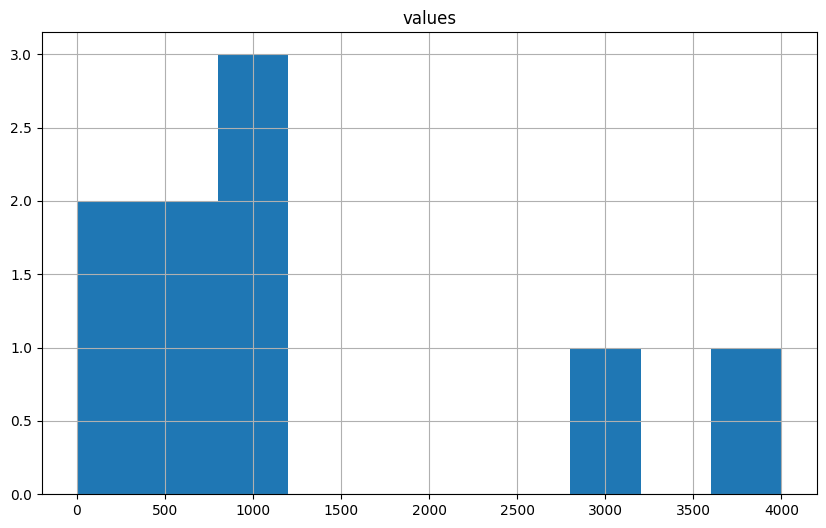

In [167]:
hist=df.hist(figsize=(10,6))
plt.show()

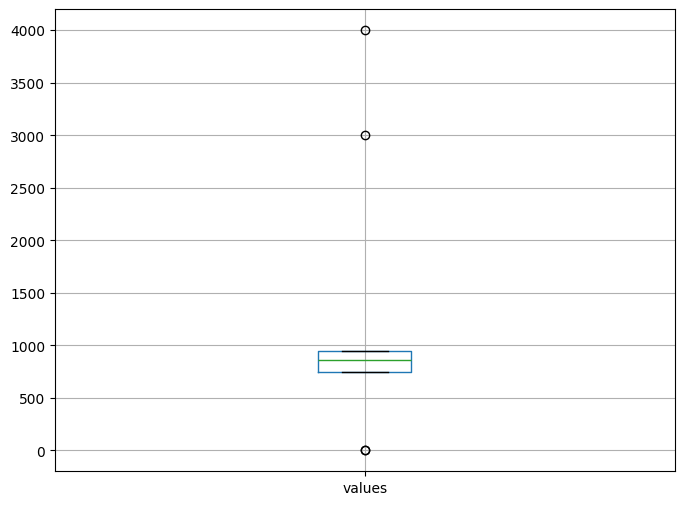

In [168]:
boxplot = df.boxplot(figsize=(8,6))

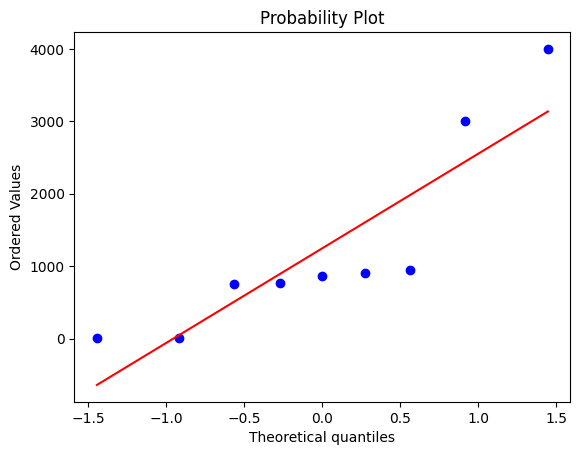

In [169]:
# convert df into a list
df_list = np.array(df).flatten().tolist()
df_list

# plot the chart
stats.probplot(df_list, dist="norm", plot=plt)
plt.show()

In [170]:
Q1=df['values'].quantile(0.25)
Q3=df['values'].quantile(0.75)

IQR=Q3-Q1

print(Q1)
print(Q3)
print(IQR)

Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR

print(Lower_Whisker, Upper_Whisker)

750.0
950.0
200.0
450.0 1250.0


In [171]:
df_filter = df[(df['values'] >= Lower_Whisker) & (df['values'] <= Upper_Whisker)]
df_filter

,values
2,750
3,768
4,860
5,899
6,950


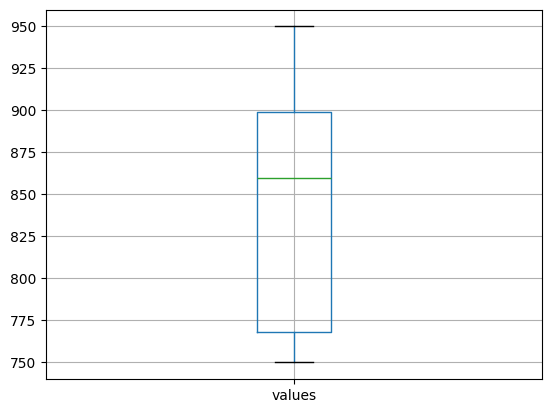

In [172]:
box_filtered = df_filter.boxplot()

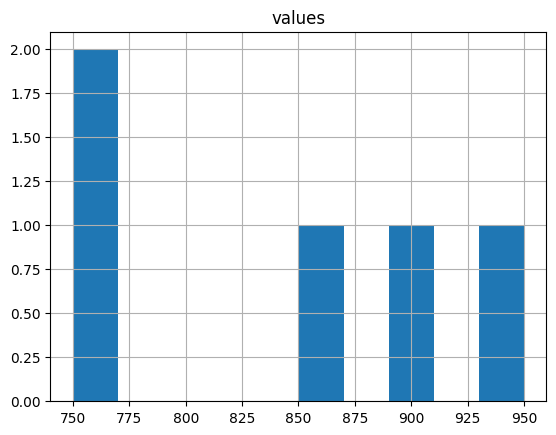

In [173]:
df_filter.hist()
plt.show()

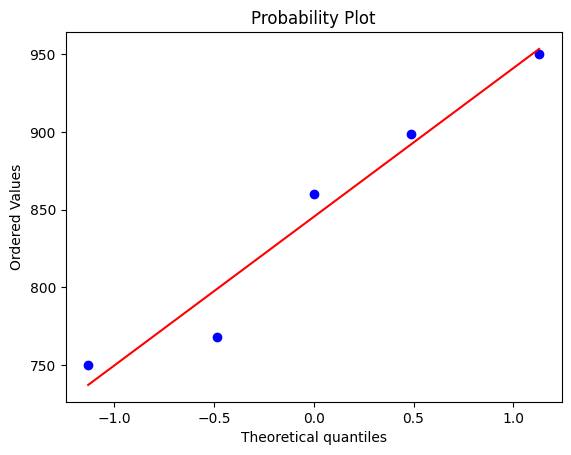

In [174]:
# convert df into a list
df_list = np.array(df_filter).flatten().tolist()
df_list

# plot the chart
stats.probplot(df_list, dist="norm", plot=plt)
plt.show()

# Box cox

**Create a skewed data and plot them**

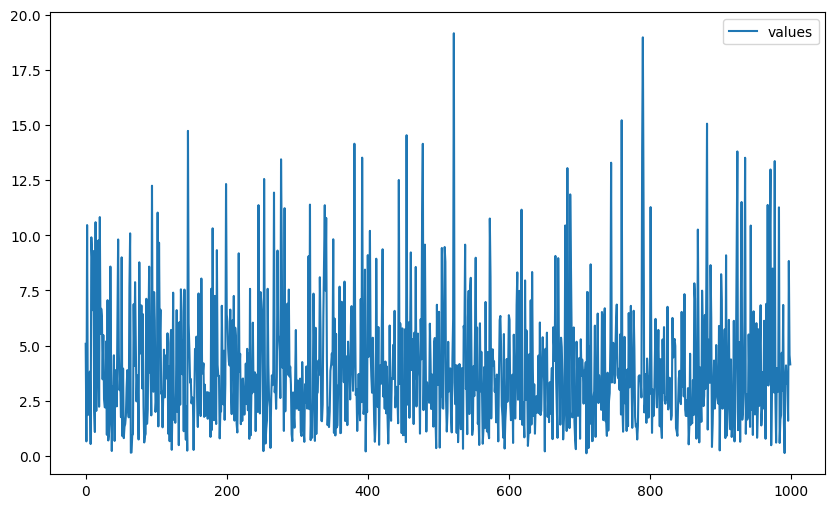

In [175]:
data = np.random.gamma(shape=2, scale=2, size=1000)
df = pd.DataFrame({'values':data})


df.plot(figsize=(10,6))
plt.show()

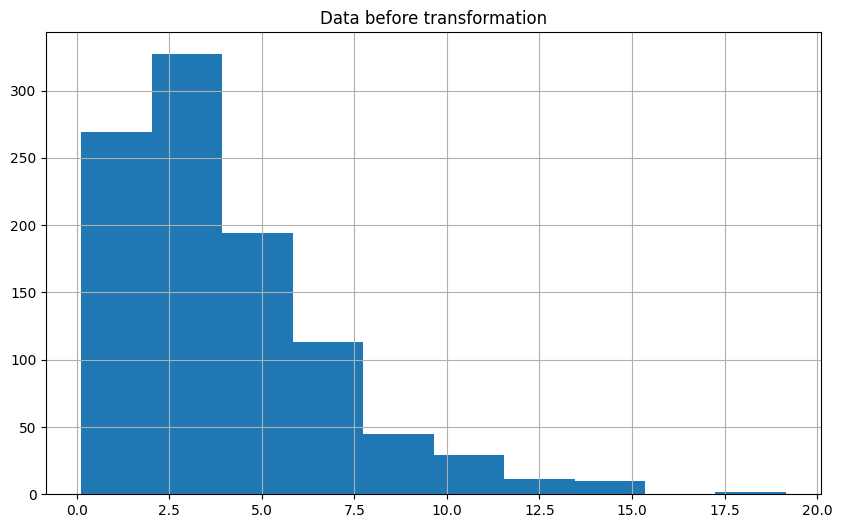

In [176]:
df.hist(figsize=(10,6))
plt.title('Data before transformation')
plt.show()

In [177]:
# calculate skeweness
df['values'].skew()

1.4645143745588343

In [178]:
# Import the transform
from scipy.stats import boxcox


In [179]:
# define column for transformation and variable for best lambda
df['values_box_cox'], best_lam = boxcox(df['values'])
df.head(5)

,values,values_box_cox
0,5.082676,2.049667
1,0.661629,-0.390475
2,10.464174,3.298218
3,1.854104,0.672859
4,3.372307,1.443217


In [180]:
# print the best lambda
best_lam

0.2747545391659422

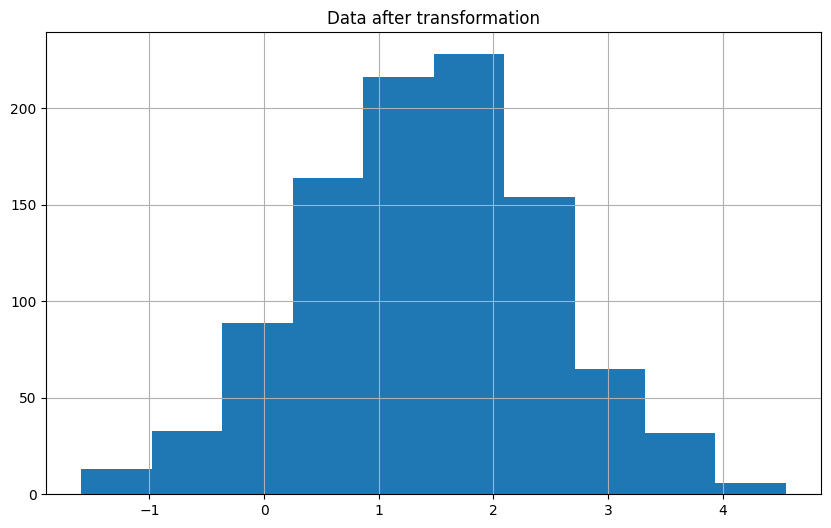

In [181]:
df['values_box_cox'].hist(figsize=(10,6))
plt.title('Data after transformation')
plt.show()

In [182]:
# calculate skeweness
df['values_box_cox'].skew()

-0.008074126179150251

**Backtransformation into original format**

In [183]:
from scipy.special import inv_boxcox

original_data = inv_boxcox(df['values_box_cox'], best_lam)
original_data

0       5.082676
1       0.661629
2      10.464174
3       1.854104
4       3.372307
         ...    
995     3.510331
996     1.596181
997     8.836738
998     4.573801
999     4.151604
Name: values_box_cox, Length: 1000, dtype: float64